# Evaluation of UNET performance upon common distortions

The aim of this notebook is to provide some informations about how a UNET initially trained to segment cells is perturbated by some common distortions applied on the input images. The tested distortions applied on the inputs are an added 2D gaussian, a gaussian noise as well as a rescaling of the input images. To evaluate the performance of the UNET, several plots are generated: the accuracy, the Jaccard index and the number of detected cells in function of the degree of degradation that depends on the parameters of the distortions.

### $\bullet$ Importing libraries and utilitary functions

In [1]:
# import python libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow

# import distortion filters and utilitary functions
from distortions import add_gaussian, zoom_image, zoom_image_to_meet_shape, add_gaussian_noise
from utils import *
from plots import show_image_mask, show_image_pred, plot_all

### $\bullet$ Setting size of the input image and different paths

In [2]:
# Shape of the inputs of the deep network.
images_shape = (256, 256, 1)

# Variables defining the path to the dataset.
test_input_path = '../Dataset/test/input/'
test_output_path = '../Dataset/test/output/'

# Variable defining where model is stored.
model_save_path = "../Model/"

### $\bullet$ Function to display the input images and predictions upon distorsion as well as a summary of values that shows the quality of the predicted images compared to the ground truth

In [3]:
def evaluation_summary(result, parameter_name, parameter_val, image, mask, distorted_image, model):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    
    """
    print("{:<45}: {}".format(parameter_name.upper()          , parameter_val))
    print("{:<45}: {}".format("Accuracy"                      , result["accuracy"]))
    print("{:<45}: {}".format("Jaccard score"                 , result["jaccard"]))
    print("{:<45}: {}".format("Precision"                     , result["precision"]))
    print("{:<45}: {}".format("Recall"                        , result["recall"]))
    print("{:<45}: {}".format("Number of cells in predictions", result["number_cells_predictions"]))
    print("{:<45}: {}".format("Number of cells in masks"      , result["number_cells_masks"]))
    show_image_mask(image, mask)
    show_image_pred(distorted_image, model)
    
    
def evaluate_model(images, masks, model, number_cells_masks=None):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    Returns:
        accuracy::[float]
            An array comprised of n_folds equally distributed arrays of y.
        jaccard_score::[float]
            An array comprised of n_folds equally distributed arrays of tX.
        number_cells_predictions::[int]
        number_cells_masks::[int]
    
    """
    predictions = get_binary_predictions(images, model)
    accuracy    = np.mean(predictions == masks)
    jaccard     = compute_jaccard_score(predictions, masks)
    precision, recall = compute_precision_recall(predictions, masks)

    number_cells_predictions = get_number_cells(predictions)
    if number_cells_masks is None:
        number_cells_masks = get_number_cells(masks)
    
    return {"accuracy": accuracy, "jaccard": jaccard, "precision": precision, 
            "recall": recall, "number_cells_predictions": number_cells_predictions,
            "number_cells_masks": number_cells_masks}


def apply_distortion_to_all(function, images, params_for_images={}):
    distorted_images = []
    for image in images:
        distorted_images.append(function(image, **params_for_images))
    
    return np.array(distorted_images)

### $\bullet$ Retrieve trained model

In [4]:
model = tensorflow.keras.models.load_model(model_save_path)

### $\bullet$ Get input images with the wanted shape from dataset

In [5]:
test_images, test_masks = get_dataset_from_folders(test_input_path, test_output_path, images_shape)

print(f'Test set contains {len(test_images)} images of shape {test_images[0].shape}.')

number_cells_masks = get_number_cells(test_masks)
print(f"{number_cells_masks} cells were counted in total over all masks.")

Test set contains 510 images of shape (256, 256, 1).
16489 cells were counted in total over all masks.


### $\bullet$ Analysis of the perturbations caused by an added gaussian on the UNET performance

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 0.0
Accuracy                                     : 0.27737639184091606
Jaccard score                                : 0.08783774235372699
Precision                                    : 0.08794597315992536
Recall                                       : 0.9872846422016585
Number of cells in predictions               : 14745
Number of cells in masks                     : 16489


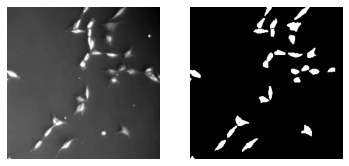

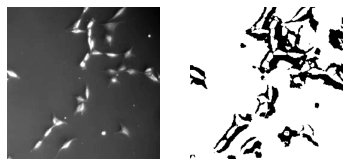

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 100.0
Accuracy                                     : 0.22707325056487437
Jaccard score                                : 0.0826186034425521
Precision                                    : 0.08266355893841033
Recall                                       : 0.9941275233441745
Number of cells in predictions               : 8662
Number of cells in masks                     : 16489


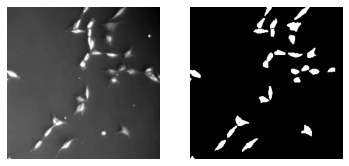

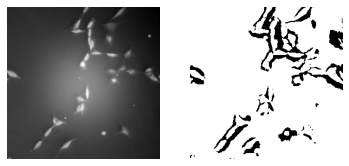

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 200.0
Accuracy                                     : 0.19446267520680147
Jaccard score                                : 0.0794156268912581
Precision                                    : 0.07943623765614409
Recall                                       : 0.9969972619144559
Number of cells in predictions               : 5901
Number of cells in masks                     : 16489


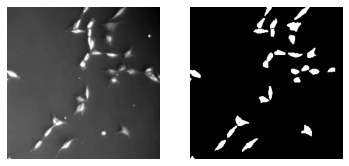

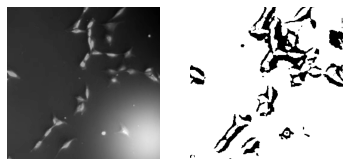

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 300.0
Accuracy                                     : 0.1643242929496017
Jaccard score                                : 0.07663863059644867
Precision                                    : 0.0766472404179536
Recall                                       : 0.9985765788837531
Number of cells in predictions               : 4006
Number of cells in masks                     : 16489


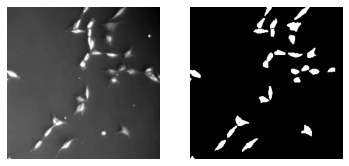

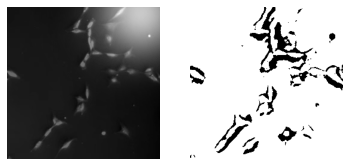

KeyboardInterrupt: 

In [6]:
parameter_name = "Amplitude of Gaussian (Before Normalization)"
amplitudes = np.linspace(0, 4000, 41)
results = {}

for amplitude in amplitudes:
    added_gaussian_test_images = apply_distortion_to_all(add_gaussian, test_images, {"amplitude": amplitude})
    
    result = evaluate_model(added_gaussian_test_images, test_masks, model, number_cells_masks)
    results[amplitude] = result
    
    evaluation_summary(result, parameter_name, amplitude, test_images[0], test_masks[0], 
                       added_gaussian_test_images[0], model)
    
plot_all(results, parameter_name)

### $\bullet$ Analysis of the perturbations caused by a gaussian noise on the UNET performance

STANDARD DEVIATION                           : 0.0
Accuracy                                     : 0.9845990349264706
Jaccard score                                : 0.8100066431665471
Precision                                    : 0.8495793541270328
Recall                                       : 0.9456964063301754
Number of cells in predictions               : 18416
Number of cells in masks                     : 16334


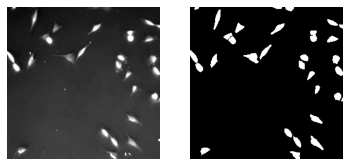

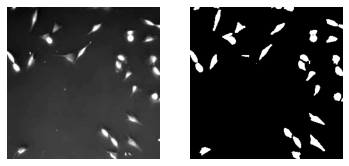

STANDARD DEVIATION                           : 5.0
Accuracy                                     : 0.9849704218845742
Jaccard score                                : 0.8096519343835575
Precision                                    : 0.8684963281700332
Recall                                       : 0.9230076000140638
Number of cells in predictions               : 19513
Number of cells in masks                     : 16334


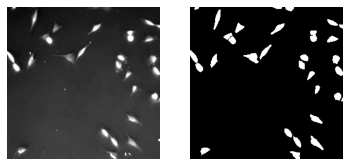

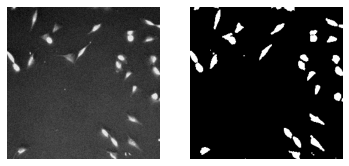

STANDARD DEVIATION                           : 10.0
Accuracy                                     : 0.9809557148054534
Jaccard score                                : 0.7583228188747242
Precision                                    : 0.8458821017643278
Recall                                       : 0.8802607627799427
Number of cells in predictions               : 29397
Number of cells in masks                     : 16334


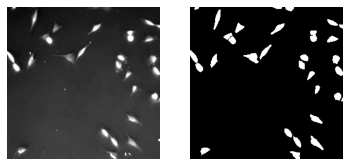

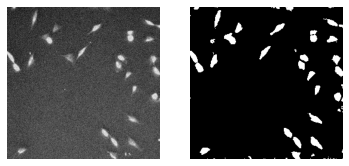

STANDARD DEVIATION                           : 15.0
Accuracy                                     : 0.9736939673330269
Jaccard score                                : 0.6794087629674073
Precision                                    : 0.7880067740360024
Recall                                       : 0.8321994702288338
Number of cells in predictions               : 42607
Number of cells in masks                     : 16334


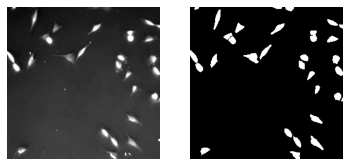

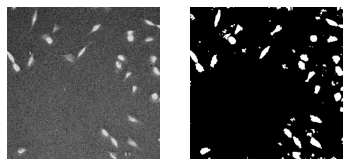

STANDARD DEVIATION                           : 20.0
Accuracy                                     : 0.9655943926642923
Jaccard score                                : 0.6018367177594064
Precision                                    : 0.7223631736054099
Recall                                       : 0.7845714984227085
Number of cells in predictions               : 56579
Number of cells in masks                     : 16334


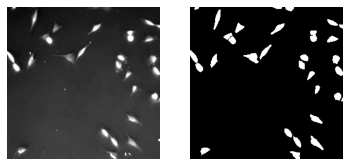

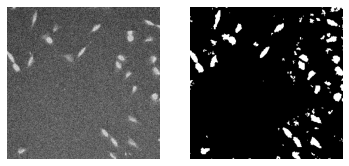

STANDARD DEVIATION                           : 25.0
Accuracy                                     : 0.9571318383310355
Jaccard score                                : 0.5297517850863461
Precision                                    : 0.6602487818609787
Recall                                       : 0.730826155768887
Number of cells in predictions               : 71763
Number of cells in masks                     : 16334


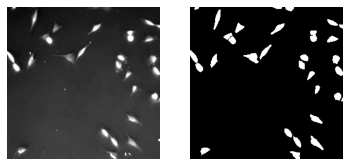

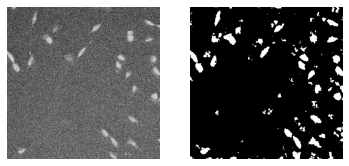

STANDARD DEVIATION                           : 30.0
Accuracy                                     : 0.9488132850796569
Jaccard score                                : 0.4674311224001059
Precision                                    : 0.602414460829557
Recall                                       : 0.6813227503634102
Number of cells in predictions               : 88817
Number of cells in masks                     : 16334


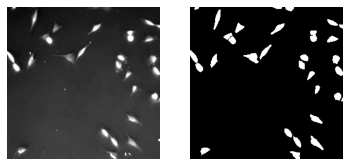

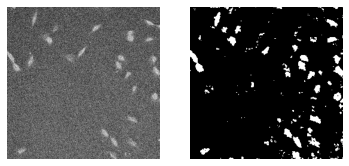

STANDARD DEVIATION                           : 35.0
Accuracy                                     : 0.9408037372663909
Jaccard score                                : 0.4123819523549271
Precision                                    : 0.5492120365498008
Recall                                       : 0.6309405772234571
Number of cells in predictions               : 104840
Number of cells in masks                     : 16334


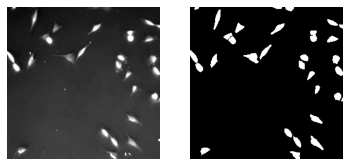

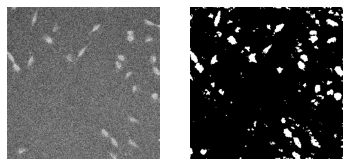

STANDARD DEVIATION                           : 40.0
Accuracy                                     : 0.9337757185393689
Jaccard score                                : 0.36799593814456283
Precision                                    : 0.5062733790673148
Recall                                       : 0.5851159921738371
Number of cells in predictions               : 118111
Number of cells in masks                     : 16334


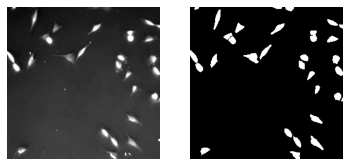

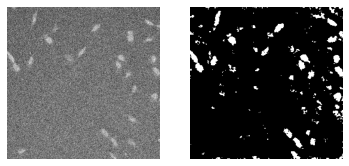

STANDARD DEVIATION                           : 45.0
Accuracy                                     : 0.9274737788181678
Jaccard score                                : 0.33035194318144206
Precision                                    : 0.4695896431149215
Recall                                       : 0.541858067952213
Number of cells in predictions               : 130130
Number of cells in masks                     : 16334


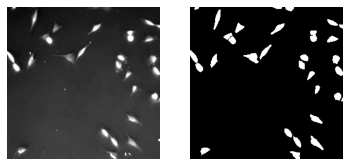

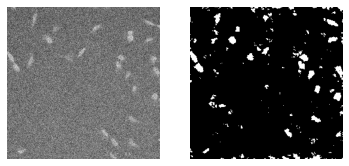

STANDARD DEVIATION                           : 50.0
Accuracy                                     : 0.9207911472694547
Jaccard score                                : 0.2968217426868114
Precision                                    : 0.42843989821807593
Recall                                       : 0.5077634520297761
Number of cells in predictions               : 145217
Number of cells in masks                     : 16334


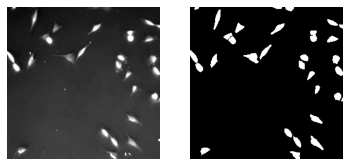

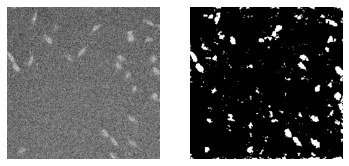

STANDARD DEVIATION                           : 55.0
Accuracy                                     : 0.9168817258348652
Jaccard score                                : 0.2704893121359697
Precision                                    : 0.40530177204987683
Recall                                       : 0.46641294937292804
Number of cells in predictions               : 151157
Number of cells in masks                     : 16334


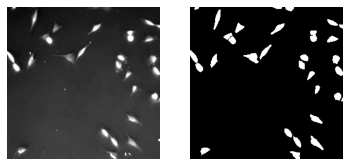

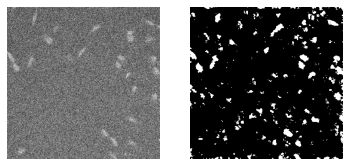

STANDARD DEVIATION                           : 60.0
Accuracy                                     : 0.9110337500478707
Jaccard score                                : 0.24528011018263987
Precision                                    : 0.37248761857346613
Recall                                       : 0.4390629379935178
Number of cells in predictions               : 163058
Number of cells in masks                     : 16334


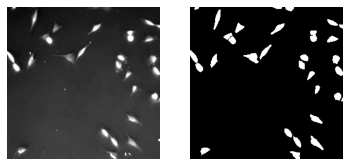

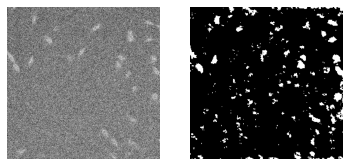

STANDARD DEVIATION                           : 65.0
Accuracy                                     : 0.9072316786822151
Jaccard score                                : 0.22228552145395644
Precision                                    : 0.3464419397382244
Recall                                       : 0.40182957183728585
Number of cells in predictions               : 170025
Number of cells in masks                     : 16334


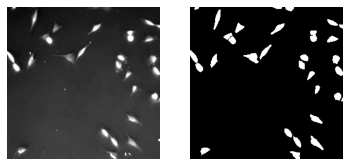

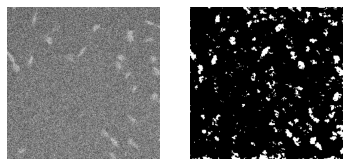

STANDARD DEVIATION                           : 70.0
Accuracy                                     : 0.9037193447935815
Jaccard score                                : 0.20706315912542164
Precision                                    : 0.32649486070915223
Recall                                       : 0.3812079079434013
Number of cells in predictions               : 176638
Number of cells in masks                     : 16334


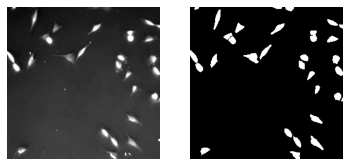

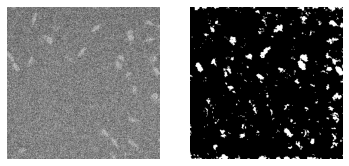

STANDARD DEVIATION                           : 75.0
Accuracy                                     : 0.9008809108360141
Jaccard score                                : 0.19403778847862915
Precision                                    : 0.30893821907556335
Recall                                       : 0.3629972672542546
Number of cells in predictions               : 183952
Number of cells in masks                     : 16334


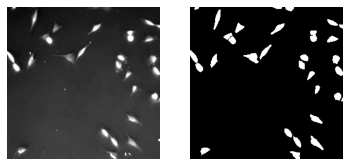

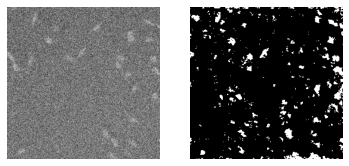

STANDARD DEVIATION                           : 80.0
Accuracy                                     : 0.897220656451057
Jaccard score                                : 0.17715181562965354
Precision                                    : 0.28690940621195543
Recall                                       : 0.33687181422561524
Number of cells in predictions               : 188068
Number of cells in masks                     : 16334


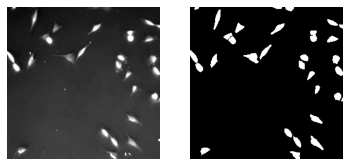

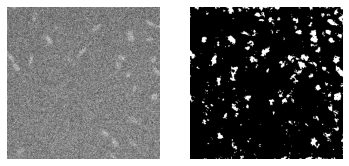

STANDARD DEVIATION                           : 85.0
Accuracy                                     : 0.8952951767865349
Jaccard score                                : 0.166418949750632
Precision                                    : 0.2722651231597406
Recall                                       : 0.31878518943277884
Number of cells in predictions               : 192416
Number of cells in masks                     : 16334


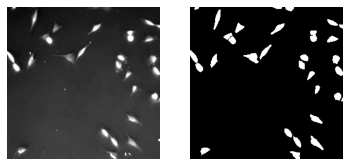

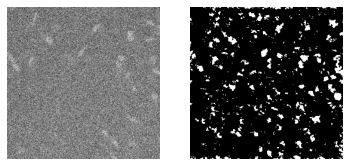

STANDARD DEVIATION                           : 90.0
Accuracy                                     : 0.8922636742685356
Jaccard score                                : 0.15844002503981533
Precision                                    : 0.2584119532978366
Recall                                       : 0.3085593211635428
Number of cells in predictions               : 198804
Number of cells in masks                     : 16334


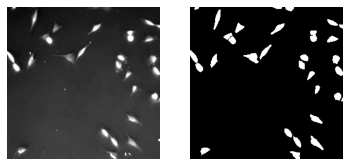

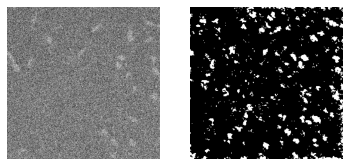

STANDARD DEVIATION                           : 95.0
Accuracy                                     : 0.8904772290996477
Jaccard score                                : 0.14813722948529479
Precision                                    : 0.24510931924029827
Recall                                       : 0.2902385478428512
Number of cells in predictions               : 200932
Number of cells in masks                     : 16334


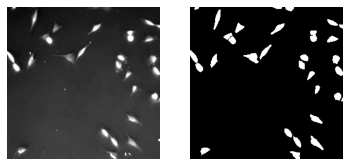

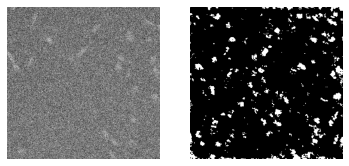

STANDARD DEVIATION                           : 100.0
Accuracy                                     : 0.8892953610887715
Jaccard score                                : 0.13920490183998724
Precision                                    : 0.2343648316586494
Recall                                       : 0.27310856491522995
Number of cells in predictions               : 201813
Number of cells in masks                     : 16334


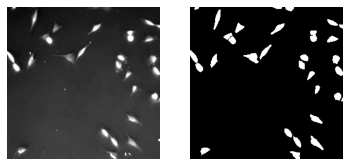

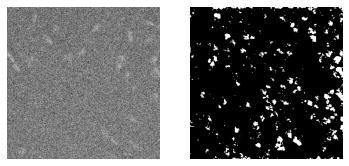

STANDARD DEVIATION                           : 105.0
Accuracy                                     : 0.8866996316348805
Jaccard score                                : 0.1341418721362584
Precision                                    : 0.22423104576067407
Recall                                       : 0.26850781015497827
Number of cells in predictions               : 208372
Number of cells in masks                     : 16334


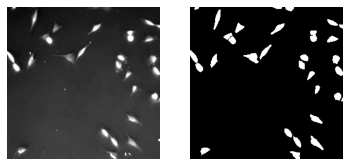

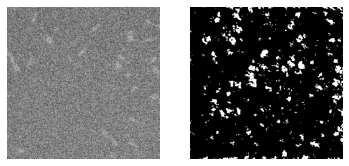

STANDARD DEVIATION                           : 110.0
Accuracy                                     : 0.8861808328067555
Jaccard score                                : 0.12703111057309113
Precision                                    : 0.21635804835340056
Recall                                       : 0.2519759120051567
Number of cells in predictions               : 208633
Number of cells in masks                     : 16334


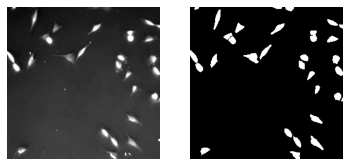

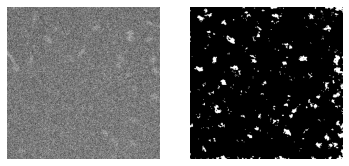

STANDARD DEVIATION                           : 115.0
Accuracy                                     : 0.885760378370098
Jaccard score                                : 0.12086697303457515
Precision                                    : 0.20886821435890962
Recall                                       : 0.23904773243322988
Number of cells in predictions               : 207287
Number of cells in masks                     : 16334


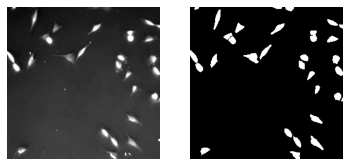

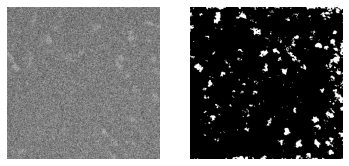

STANDARD DEVIATION                           : 120.0
Accuracy                                     : 0.8827128990023744
Jaccard score                                : 0.1149405979407969
Precision                                    : 0.19657945544054903
Recall                                       : 0.23159572854083035
Number of cells in predictions               : 213291
Number of cells in masks                     : 16334


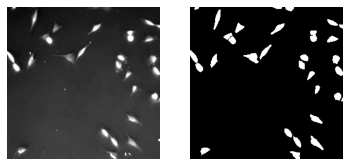

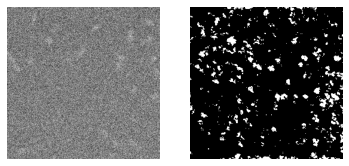

STANDARD DEVIATION                           : 125.0
Accuracy                                     : 0.8828287162032782
Jaccard score                                : 0.11169325915442302
Precision                                    : 0.19252723480131206
Recall                                       : 0.22566396500135627
Number of cells in predictions               : 213291
Number of cells in masks                     : 16334


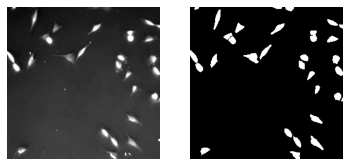

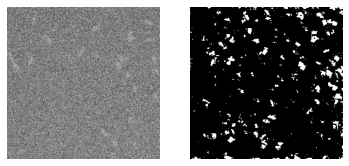

STANDARD DEVIATION                           : 130.0
Accuracy                                     : 0.8810367359834559
Jaccard score                                : 0.10817876807410995
Precision                                    : 0.186079083081299
Recall                                       : 0.2198224386825689
Number of cells in predictions               : 217018
Number of cells in masks                     : 16334


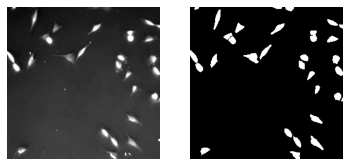

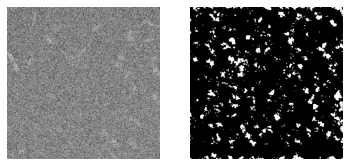

STANDARD DEVIATION                           : 135.0
Accuracy                                     : 0.8802173390107997
Jaccard score                                : 0.10340493702597144
Precision                                    : 0.17985645017350324
Recall                                       : 0.2118102847376977
Number of cells in predictions               : 217670
Number of cells in masks                     : 16334


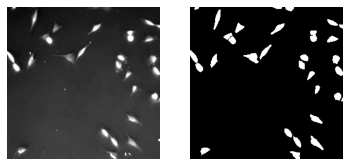

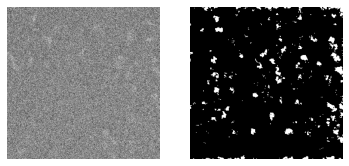

STANDARD DEVIATION                           : 140.0
Accuracy                                     : 0.8799234128465839
Jaccard score                                : 0.09934702541467176
Precision                                    : 0.17319224253626178
Recall                                       : 0.20255507757282562
Number of cells in predictions               : 216316
Number of cells in masks                     : 16334


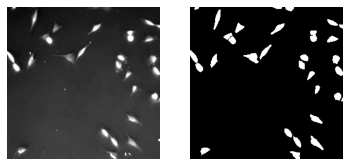

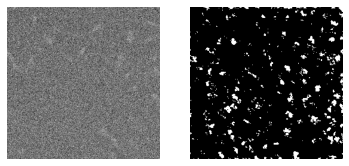

STANDARD DEVIATION                           : 145.0
Accuracy                                     : 0.8792388616823683
Jaccard score                                : 0.09648955894893364
Precision                                    : 0.16912836344513818
Recall                                       : 0.19797641478139494
Number of cells in predictions               : 217109
Number of cells in masks                     : 16334


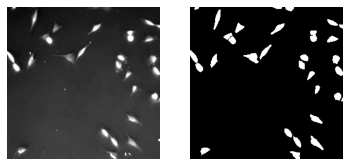

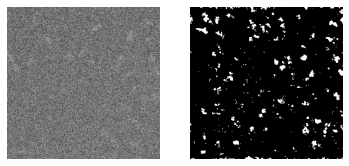

STANDARD DEVIATION                           : 150.0
Accuracy                                     : 0.878530075970818
Jaccard score                                : 0.0943266654744408
Precision                                    : 0.16554703528420586
Recall                                       : 0.19264804906556432
Number of cells in predictions               : 219921
Number of cells in masks                     : 16334


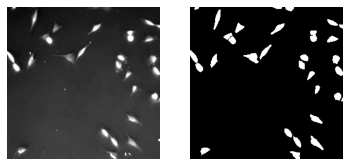

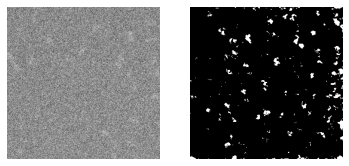

STANDARD DEVIATION                           : 155.0
Accuracy                                     : 0.8779849183325674
Jaccard score                                : 0.09071291126436182
Precision                                    : 0.16059482788268298
Recall                                       : 0.18613336548930828
Number of cells in predictions               : 218440
Number of cells in masks                     : 16334


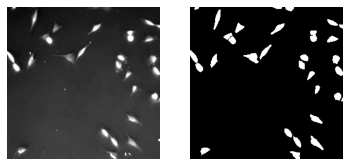

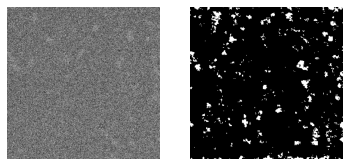

STANDARD DEVIATION                           : 160.0
Accuracy                                     : 0.8762384751263786
Jaccard score                                : 0.08902940114587589
Precision                                    : 0.15654122895235986
Recall                                       : 0.18455484225281812
Number of cells in predictions               : 222312
Number of cells in masks                     : 16334


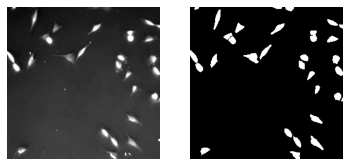

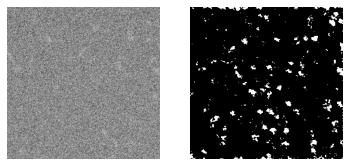

STANDARD DEVIATION                           : 165.0
Accuracy                                     : 0.8765176810470282
Jaccard score                                : 0.08665487698156343
Precision                                    : 0.15349676852761232
Recall                                       : 0.17877537244592231
Number of cells in predictions               : 221161
Number of cells in masks                     : 16334


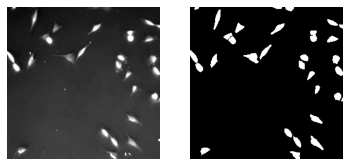

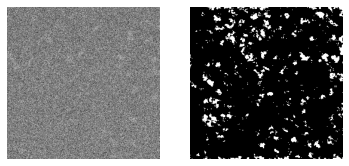

STANDARD DEVIATION                           : 170.0
Accuracy                                     : 0.8744617836148131
Jaccard score                                : 0.08294124240131132
Precision                                    : 0.14600765104550106
Recall                                       : 0.17283490196389192
Number of cells in predictions               : 225348
Number of cells in masks                     : 16334


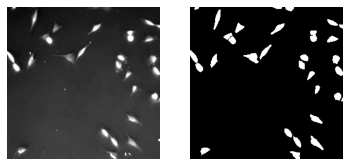

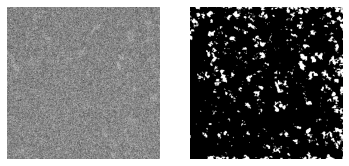

STANDARD DEVIATION                           : 175.0
Accuracy                                     : 0.8748744590609682
Jaccard score                                : 0.08267259425909558
Precision                                    : 0.14603149114225725
Recall                                       : 0.17101858910353734
Number of cells in predictions               : 223383
Number of cells in masks                     : 16334


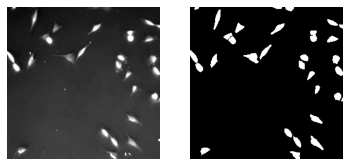

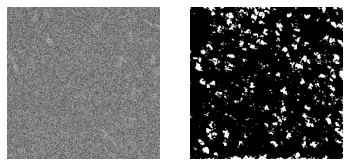

STANDARD DEVIATION                           : 180.0
Accuracy                                     : 0.8746079687978707
Jaccard score                                : 0.08043451649816792
Precision                                    : 0.14250677653401841
Recall                                       : 0.16729690813544837
Number of cells in predictions               : 224203
Number of cells in masks                     : 16334


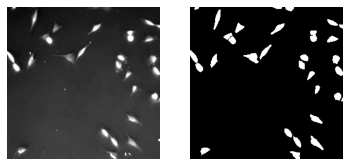

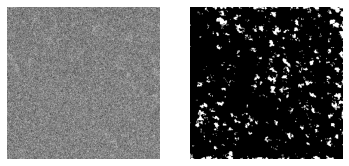

STANDARD DEVIATION                           : 185.0
Accuracy                                     : 0.8741218118106617
Jaccard score                                : 0.07905952137773824
Precision                                    : 0.14027318262754465
Recall                                       : 0.1647732813854689
Number of cells in predictions               : 225445
Number of cells in masks                     : 16334


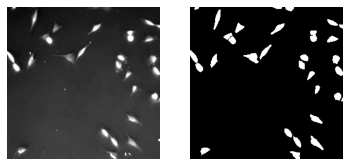

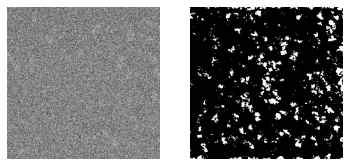

STANDARD DEVIATION                           : 190.0
Accuracy                                     : 0.8738401225968904
Jaccard score                                : 0.07801954916537852
Precision                                    : 0.13833857806298272
Recall                                       : 0.1636480567186427
Number of cells in predictions               : 225173
Number of cells in masks                     : 16334


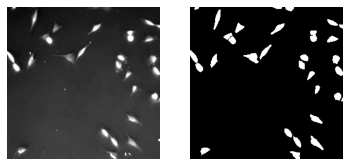

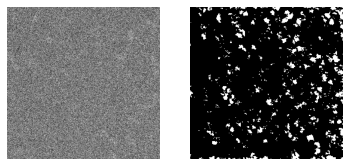

STANDARD DEVIATION                           : 195.0
Accuracy                                     : 0.8731131160960478
Jaccard score                                : 0.07492114604047506
Precision                                    : 0.13318409684099694
Recall                                       : 0.15694747957702207
Number of cells in predictions               : 226452
Number of cells in masks                     : 16334


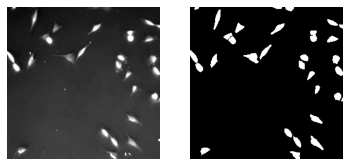

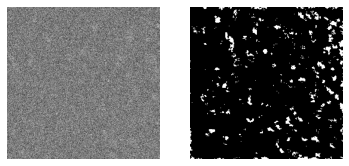

STANDARD DEVIATION                           : 200.0
Accuracy                                     : 0.8733520807004442
Jaccard score                                : 0.073307470789726
Precision                                    : 0.13165039440741028
Recall                                       : 0.15313827920876547
Number of cells in predictions               : 225121
Number of cells in masks                     : 16334


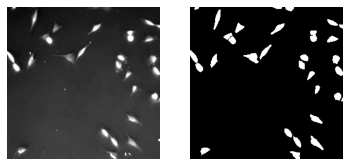

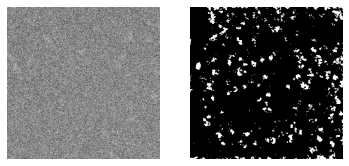

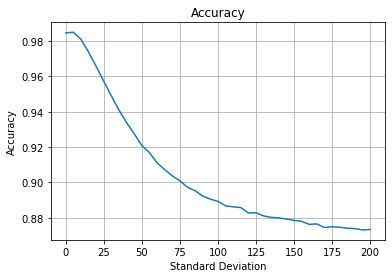

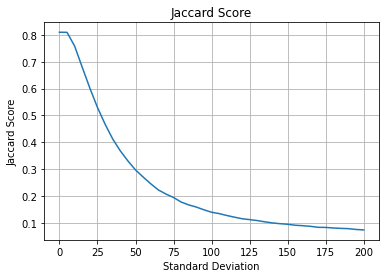

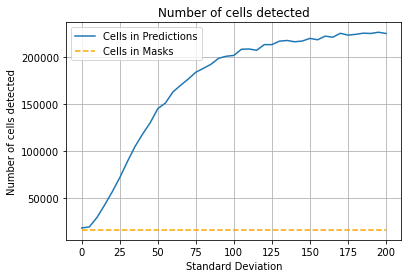

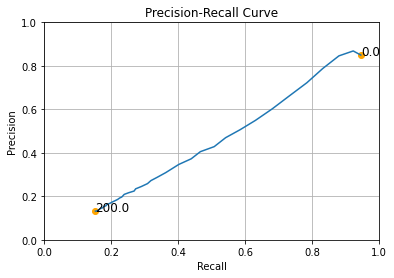

In [7]:
parameter_name = "Standard Deviation"
mean = 0
sigmas = np.linspace(0, 200, 41)
results = {}
for sigma in sigmas:
    noisy_test_images = apply_distortion_to_all(add_gaussian_noise, test_images, {"mean": mean, "sigma": sigma})

    result = evaluate_model(noisy_test_images, test_masks, model, number_cells_masks)
    results[sigma] = result
    
    evaluation_summary(result, parameter_name, sigma, test_images[0], test_masks[0], noisy_test_images[0], model)
        
plot_all(results, parameter_name)

### $\bullet$ Analysis of the perturbations caused by a rescaling of the images on the UNET performance

ZOOMING FACTOR FROM PATCHES                  : 0.5
Accuracy                                     : 0.9809754315544578
Jaccard score                                : 0.32014159999249003
Precision                                    : 0.4414219293739401
Recall                                       : 0.5383395544474988
Number of cells in predictions               : 11255
Number of cells in masks                     : 14837


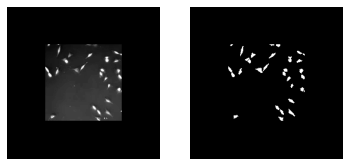

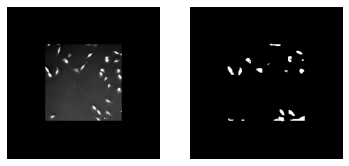

ZOOMING FACTOR FROM PATCHES                  : 0.6
Accuracy                                     : 0.9800039253982843
Jaccard score                                : 0.5014420733805387
Precision                                    : 0.5716966598827429
Recall                                       : 0.8041782339310195
Number of cells in predictions               : 13859
Number of cells in masks                     : 15362


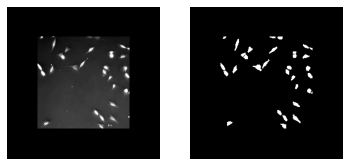

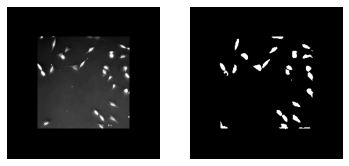

ZOOMING FACTOR FROM PATCHES                  : 0.7
Accuracy                                     : 0.9808056102079503
Jaccard score                                : 0.6138001275503371
Precision                                    : 0.6515844098522307
Recall                                       : 0.9151702584336774
Number of cells in predictions               : 15448
Number of cells in masks                     : 15685


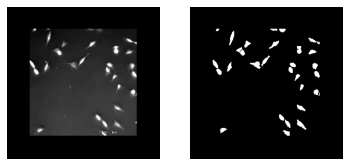

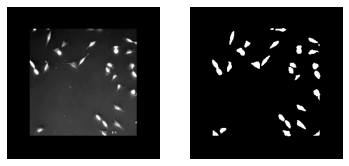

ZOOMING FACTOR FROM PATCHES                  : 0.8
Accuracy                                     : 0.9780878104415595
Jaccard score                                : 0.6534062525218938
Precision                                    : 0.6811932259990867
Recall                                       : 0.9415926634195118
Number of cells in predictions               : 16874
Number of cells in masks                     : 15851


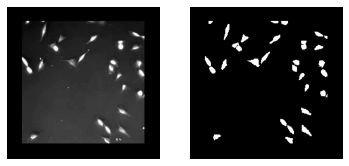

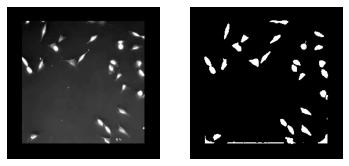

ZOOMING FACTOR FROM PATCHES                  : 0.9
Accuracy                                     : 0.9774095423081341
Jaccard score                                : 0.696933986559389
Precision                                    : 0.7303300942111739
Recall                                       : 0.9391697839066645
Number of cells in predictions               : 17450
Number of cells in masks                     : 16251


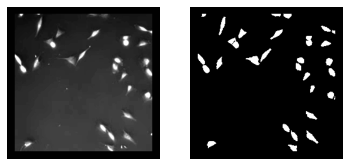

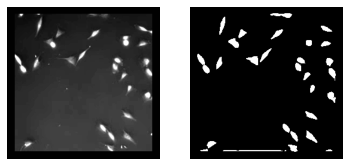

ZOOMING FACTOR FROM PATCHES                  : 1.0
Accuracy                                     : 0.9904918895048254
Jaccard score                                : 0.8769389353090957
Precision                                    : 0.9226935745674734
Recall                                       : 0.9466541342248583
Number of cells in predictions               : 17037
Number of cells in masks                     : 16334


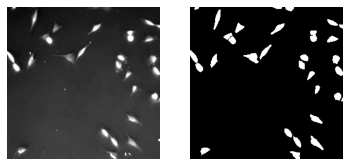

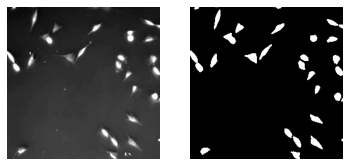

ZOOMING FACTOR FROM PATCHES                  : 1.1
Accuracy                                     : 0.9881166944316789
Jaccard score                                : 0.8417767984939982
Precision                                    : 0.922077093091939
Recall                                       : 0.9065037354361212
Number of cells in predictions               : 14609
Number of cells in masks                     : 13874


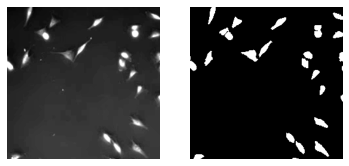

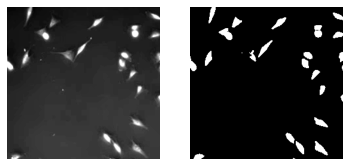

ZOOMING FACTOR FROM PATCHES                  : 1.2000000000000002
Accuracy                                     : 0.9870450786515779
Jaccard score                                : 0.8227617357693744
Precision                                    : 0.9339287803809094
Recall                                       : 0.8738949090745581
Number of cells in predictions               : 12715
Number of cells in masks                     : 11833


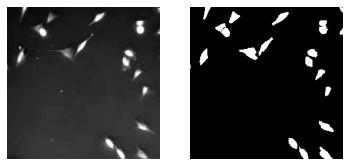

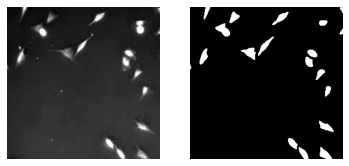

ZOOMING FACTOR FROM PATCHES                  : 1.3
Accuracy                                     : 0.9849328732958027
Jaccard score                                : 0.7875527078752159
Precision                                    : 0.9366434826380546
Recall                                       : 0.8319648490159156
Number of cells in predictions               : 11311
Number of cells in masks                     : 10291


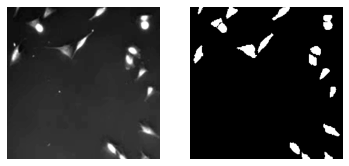

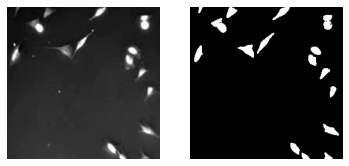

ZOOMING FACTOR FROM PATCHES                  : 1.4
Accuracy                                     : 0.9824527516084559
Jaccard score                                : 0.7487142937454159
Precision                                    : 0.9382797890116802
Recall                                       : 0.7876099211080732
Number of cells in predictions               : 10103
Number of cells in masks                     : 9017


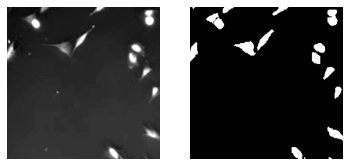

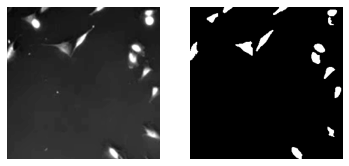

ZOOMING FACTOR FROM PATCHES                  : 1.5
Accuracy                                     : 0.9801217172660079
Jaccard score                                : 0.7136520378463643
Precision                                    : 0.933515524905837
Recall                                       : 0.7521403119875365
Number of cells in predictions               : 9095
Number of cells in masks                     : 8470


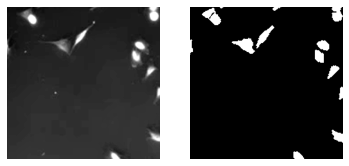

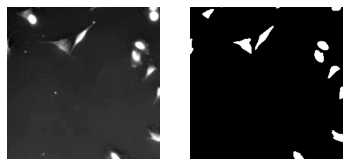

ZOOMING FACTOR FROM PATCHES                  : 1.6
Accuracy                                     : 0.9775317622166054
Jaccard score                                : 0.6764933156306483
Precision                                    : 0.9335192795058069
Recall                                       : 0.7107877241307412
Number of cells in predictions               : 8363
Number of cells in masks                     : 7199


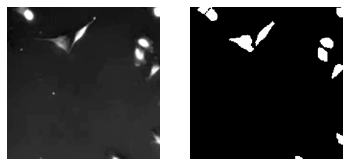

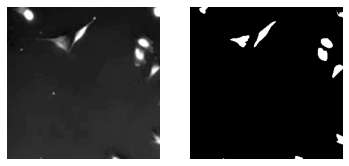

ZOOMING FACTOR FROM PATCHES                  : 1.7000000000000002
Accuracy                                     : 0.9761261883903952
Jaccard score                                : 0.6546924609609309
Precision                                    : 0.9319211170413892
Recall                                       : 0.6881505465629811
Number of cells in predictions               : 7708
Number of cells in masks                     : 6524


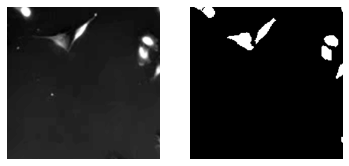

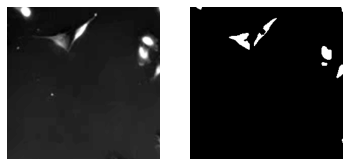

ZOOMING FACTOR FROM PATCHES                  : 1.8
Accuracy                                     : 0.9748720356062347
Jaccard score                                : 0.6364822195470674
Precision                                    : 0.9299199491450573
Recall                                       : 0.6692840752155986
Number of cells in predictions               : 7188
Number of cells in masks                     : 6006


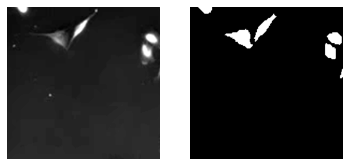

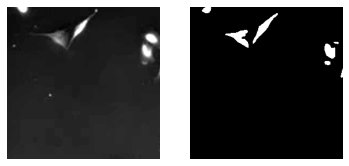

ZOOMING FACTOR FROM PATCHES                  : 1.9000000000000001
Accuracy                                     : 0.9743398928174786
Jaccard score                                : 0.6323206032034856
Precision                                    : 0.9276800228925097
Recall                                       : 0.6657460346651961
Number of cells in predictions               : 6753
Number of cells in masks                     : 5643


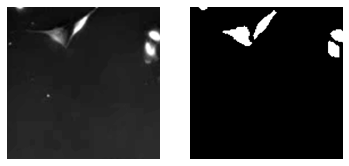

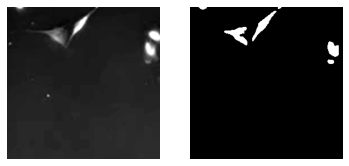

ZOOMING FACTOR FROM PATCHES                  : 2.0
Accuracy                                     : 0.9735915539311427
Jaccard score                                : 0.6265966243436979
Precision                                    : 0.9252840820402902
Recall                                       : 0.6604530305387362
Number of cells in predictions               : 6238
Number of cells in masks                     : 4861


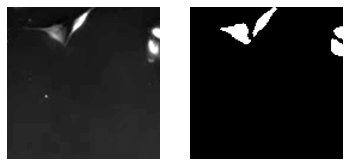

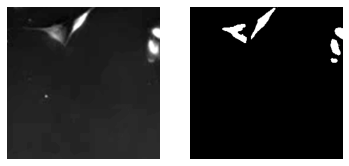

ZOOMING FACTOR FROM PATCHES                  : 2.5
Accuracy                                     : 0.9727641086952359
Jaccard score                                : 0.6079779161668069
Precision                                    : 0.9071135977406725
Recall                                       : 0.6447651878983012
Number of cells in predictions               : 4539
Number of cells in masks                     : 3918


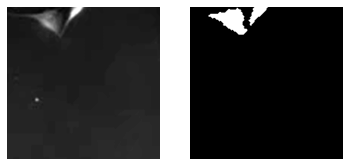

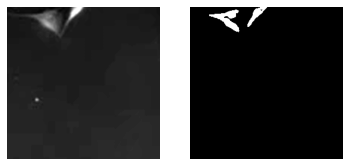

ZOOMING FACTOR FROM PATCHES                  : 3.0
Accuracy                                     : 0.9695801678825827
Jaccard score                                : 0.5391411695315674
Precision                                    : 0.8627829885846691
Recall                                       : 0.5731063910415919
Number of cells in predictions               : 3613
Number of cells in masks                     : 2753


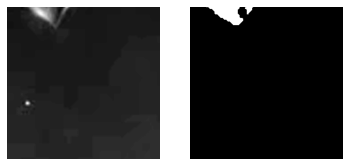

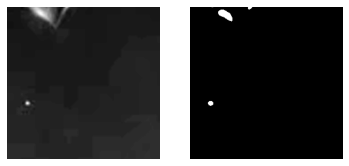

ZOOMING FACTOR FROM PATCHES                  : 3.5
Accuracy                                     : 0.9667547487745098
Jaccard score                                : 0.46421184185934417
Precision                                    : 0.8145176193959419
Recall                                       : 0.49046193246846115
Number of cells in predictions               : 2914
Number of cells in masks                     : 2289


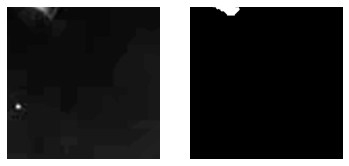

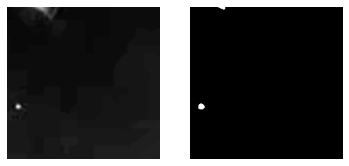

ZOOMING FACTOR FROM PATCHES                  : 4.0
Accuracy                                     : 0.9632936066272212
Jaccard score                                : 0.37922679153062916
Precision                                    : 0.7545315121030562
Recall                                       : 0.39764113588211486
Number of cells in predictions               : 2429
Number of cells in masks                     : 1887


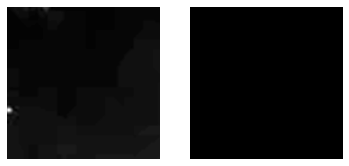

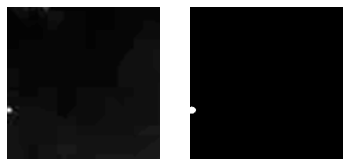

ZOOMING FACTOR FROM PATCHES                  : 4.5
Accuracy                                     : 0.9597116507735907
Jaccard score                                : 0.3059646826905436
Precision                                    : 0.6952250041098486
Recall                                       : 0.31990216631085167
Number of cells in predictions               : 2090
Number of cells in masks                     : 1664


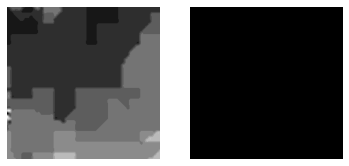

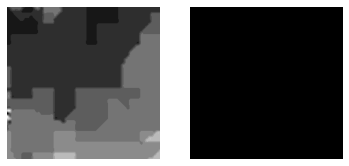

ZOOMING FACTOR FROM PATCHES                  : 5.0
Accuracy                                     : 0.9557917576210172
Jaccard score                                : 0.24258088992600182
Precision                                    : 0.646217990831614
Recall                                       : 0.25067246530504256
Number of cells in predictions               : 1878
Number of cells in masks                     : 1472


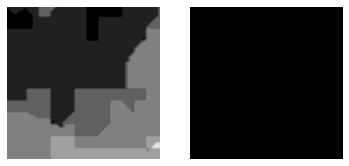

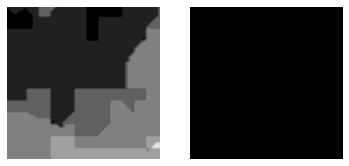

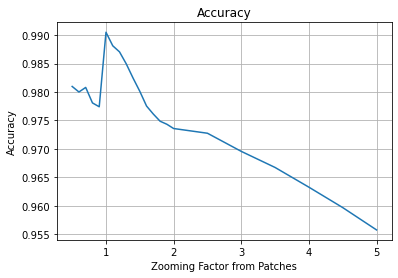

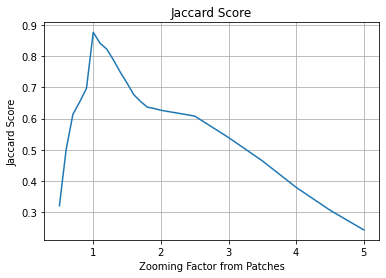

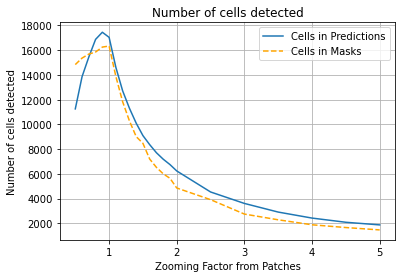

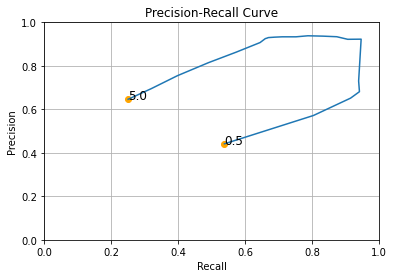

In [8]:
parameter_name = "Zooming Factor from Patches"
zooms = np.r_[np.linspace(0.5, 2, 15, endpoint=False), np.linspace(2, 5, 7)]
results = {}
for zoom in zooms:
    zoomed_test_images = apply_distortion_to_all(zoom_image, test_images, {"zoom_factor": zoom})
    zoomed_test_masks  = apply_distortion_to_all(zoom_image, test_masks , {"zoom_factor": zoom, "val_padding": 0})

    result = evaluate_model(zoomed_test_images, zoomed_test_masks, model)
    results[zoom] = result
    
    evaluation_summary(result, parameter_name, zoom, zoomed_test_images[0], zoomed_test_masks[0], zoomed_test_images[0], model)
    
plot_all(results, parameter_name)

### $\bullet$ Get full input images from dataset

In [9]:
test_full_images, test_full_masks = get_dataset_from_folders(test_input_path, test_output_path)
full_images_shape = (*test_full_images[0].shape, 1)

print(f'Test set contains {len(test_full_images)} images of shape {full_images_shape}.')

Test set contains 85 images of shape (576, 720, 1).


### $\bullet$ Analysis of the perturbations caused by havind different sizes of cells on the UNET performance

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.5
Accuracy                                     : 0.952992338292739
Jaccard score                                : 0.44174788489958156
Precision                                    : 0.697079236930672
Recall                                       : 0.547650857346863
Number of cells in predictions               : 41287
Number of cells in masks                     : 55602


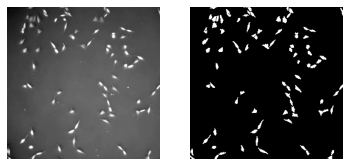

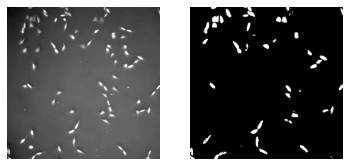

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.6
Accuracy                                     : 0.9706984875248927
Jaccard score                                : 0.6648571207425972
Precision                                    : 0.7810666472938553
Recall                                       : 0.8177592733249593
Number of cells in predictions               : 36121
Number of cells in masks                     : 40685


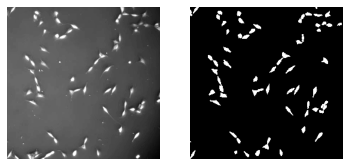

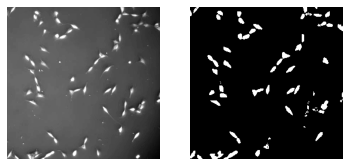

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.7
Accuracy                                     : 0.980473118202359
Jaccard score                                : 0.7734925792207004
Precision                                    : 0.8230987173801333
Recall                                       : 0.9278431763513174
Number of cells in predictions               : 29903
Number of cells in masks                     : 31455


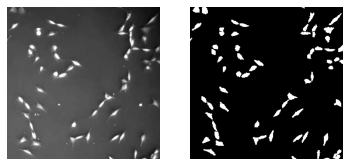

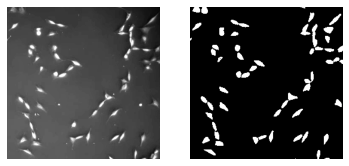

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.8
Accuracy                                     : 0.9856410606234681
Jaccard score                                : 0.8221501792739697
Precision                                    : 0.8593259804084373
Recall                                       : 0.9502907901829878
Number of cells in predictions               : 23637
Number of cells in masks                     : 24086


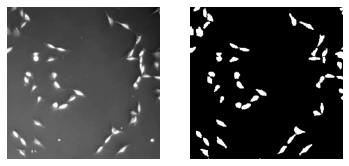

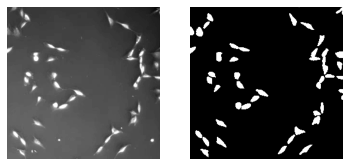

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.9
Accuracy                                     : 0.9876214420094209
Jaccard score                                : 0.8403427755854465
Precision                                    : 0.881593254062255
Recall                                       : 0.9474352062990133
Number of cells in predictions               : 19604
Number of cells in masks                     : 19359


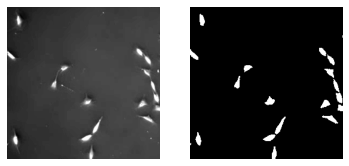

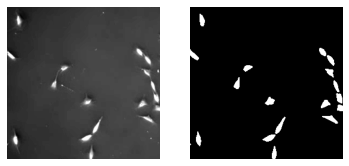

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.0
Accuracy                                     : 0.9905660591873469
Jaccard score                                : 0.8769850768285996
Precision                                    : 0.9214543820273258
Recall                                       : 0.9480658162572329
Number of cells in predictions               : 17011
Number of cells in masks                     : 16462


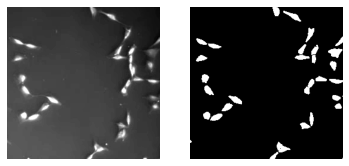

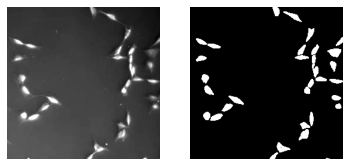

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.1
Accuracy                                     : 0.9875260809890363
Jaccard score                                : 0.8348603801946607
Precision                                    : 0.9134872311705422
Recall                                       : 0.9068701164636803
Number of cells in predictions               : 16942
Number of cells in masks                     : 15929


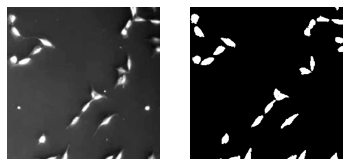

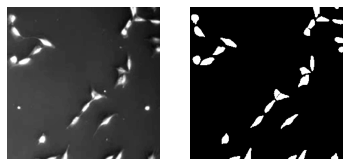

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.2000000000000002
Accuracy                                     : 0.9862600887522978
Jaccard score                                : 0.8122776487223001
Precision                                    : 0.9213653194134679
Recall                                       : 0.8729783891784499
Number of cells in predictions               : 19014
Number of cells in masks                     : 17462


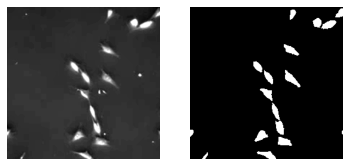

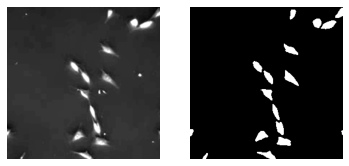

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.3
Accuracy                                     : 0.9838131354836857
Jaccard score                                : 0.7799239158041256
Precision                                    : 0.9279478426110772
Recall                                       : 0.8305831285461738
Number of cells in predictions               : 19298
Number of cells in masks                     : 17318


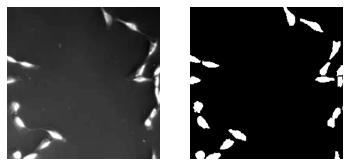

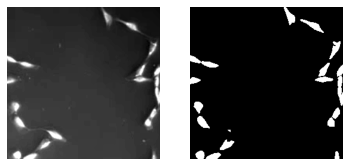

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.4
Accuracy                                     : 0.9814544228946461
Jaccard score                                : 0.7403232540525058
Precision                                    : 0.9286866572661397
Recall                                       : 0.7860823876817137
Number of cells in predictions               : 20653
Number of cells in masks                     : 18041


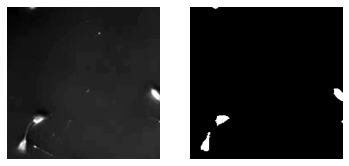

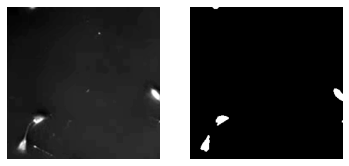

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.5
Accuracy                                     : 0.9785192665933561
Jaccard score                                : 0.7047398212235452
Precision                                    : 0.9255344447089122
Recall                                       : 0.748464071075575
Number of cells in predictions               : 22282
Number of cells in masks                     : 19045


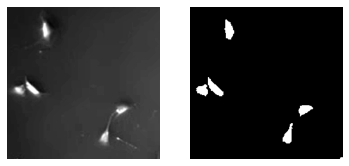

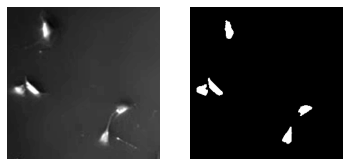

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.6
Accuracy                                     : 0.9760668137494255
Jaccard score                                : 0.6734993401213886
Precision                                    : 0.924306656082701
Recall                                       : 0.7140135235335092
Number of cells in predictions               : 23927
Number of cells in masks                     : 19880


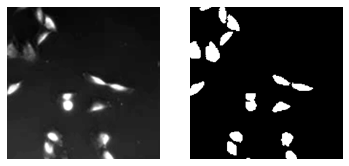

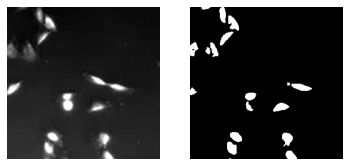

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.7000000000000002
Accuracy                                     : 0.9743534063202104
Jaccard score                                : 0.6487109949600971
Precision                                    : 0.9174823084018499
Recall                                       : 0.6897600562247924
Number of cells in predictions               : 24574
Number of cells in masks                     : 20047


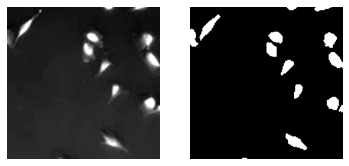

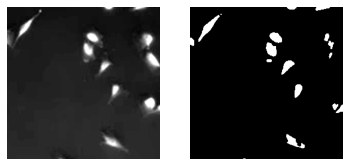

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.8
Accuracy                                     : 0.9725908436494715
Jaccard score                                : 0.633950318598146
Precision                                    : 0.9148506715026785
Recall                                       : 0.6746479582653089
Number of cells in predictions               : 26094
Number of cells in masks                     : 20872


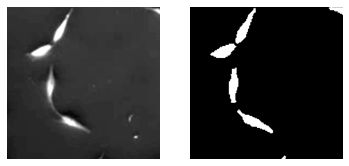

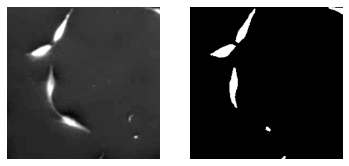

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.9000000000000001
Accuracy                                     : 0.9716218602017064
Jaccard score                                : 0.6252844718869857
Precision                                    : 0.9113382810575068
Recall                                       : 0.6671441930439307
Number of cells in predictions               : 27857
Number of cells in masks                     : 22017


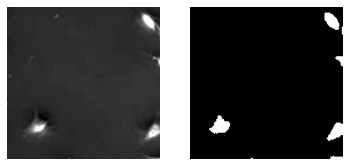

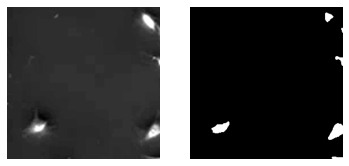

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 2.0
Accuracy                                     : 0.9708987319048713
Jaccard score                                : 0.6205203951719228
Precision                                    : 0.9140514326465671
Recall                                       : 0.6602104145995599
Number of cells in predictions               : 28497
Number of cells in masks                     : 21752


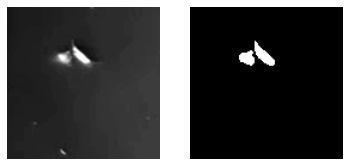

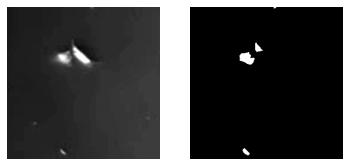

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 2.5
Accuracy                                     : 0.9677002275331708
Jaccard score                                : 0.5820233503866862
Precision                                    : 0.8884667823171465
Recall                                       : 0.6241849452039876
Number of cells in predictions               : 32768
Number of cells in masks                     : 25110


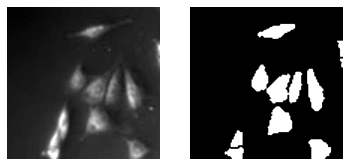

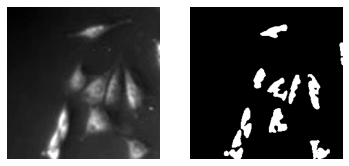

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 3.0
Accuracy                                     : 0.964182384636626
Jaccard score                                : 0.5082966060263003
Precision                                    : 0.8414096370508297
Recall                                       : 0.5477865635084412
Number of cells in predictions               : 37133
Number of cells in masks                     : 27753


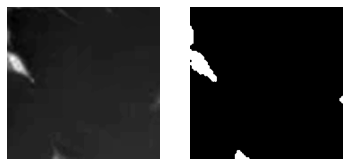

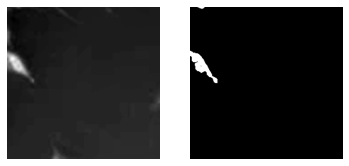

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 3.5
Accuracy                                     : 0.9594292345622553
Jaccard score                                : 0.4322751812981998
Precision                                    : 0.7987579577569149
Recall                                       : 0.46060554421798555
Number of cells in predictions               : 40611
Number of cells in masks                     : 30996


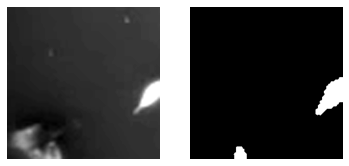

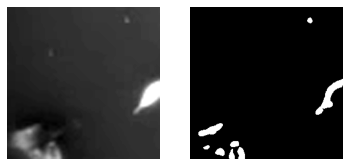

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 4.0
Accuracy                                     : 0.9555574865902171
Jaccard score                                : 0.35680997436924106
Precision                                    : 0.7458491530919508
Recall                                       : 0.3785807219650132
Number of cells in predictions               : 34963
Number of cells in masks                     : 27231


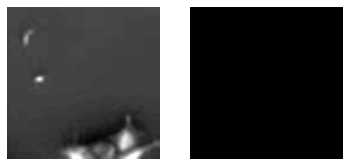

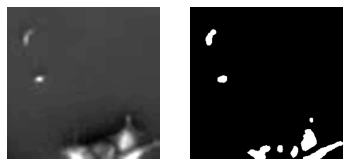

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 4.5
Accuracy                                     : 0.9499152531343348
Jaccard score                                : 0.28480159085700585
Precision                                    : 0.693990989658658
Recall                                       : 0.2989367938676275
Number of cells in predictions               : 29058
Number of cells in masks                     : 23578


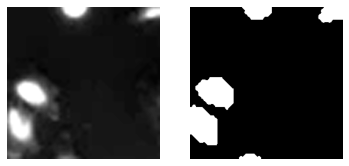

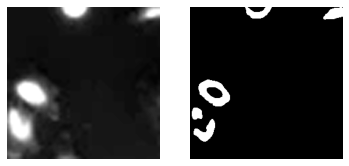

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 5.0
Accuracy                                     : 0.9477239294613109
Jaccard score                                : 0.2294797910148022
Precision                                    : 0.6389082440142241
Recall                                       : 0.23991290967264953
Number of cells in predictions               : 25434
Number of cells in masks                     : 20961


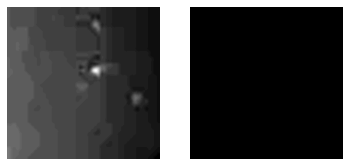

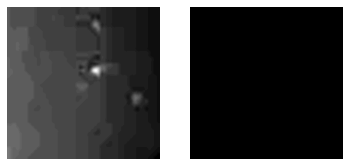

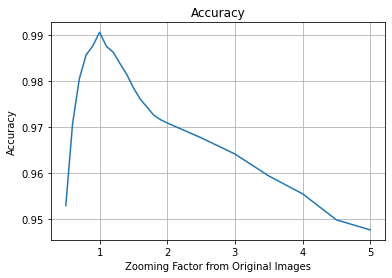

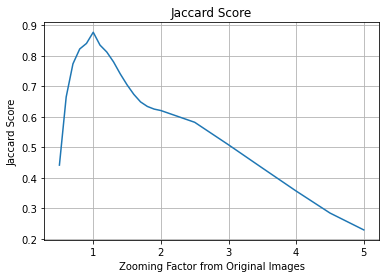

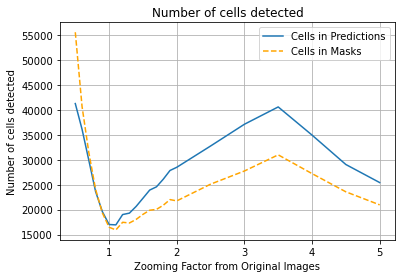

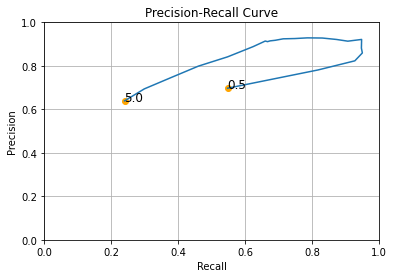

In [10]:
parameter_name = "Zooming Factor from Original Images"
zooms = np.r_[np.linspace(0.5, 2, 15, endpoint=False), np.linspace(2, 5, 7)]
results = {}
for zoom in zooms:
    patch_shape = (int(images_shape[0] / zoom), int(images_shape[1] / zoom), 1)
    n_patches = np.clip(np.prod(np.divide(full_images_shape, patch_shape)), 6, 80).astype('uint')
    patch_images, patch_masks = split_images_and_masks_into_patches(test_full_images, test_full_masks, patch_shape, n_patches)
    
    zoomed_test_images = apply_distortion_to_all(zoom_image_to_meet_shape, patch_images, {"shape": images_shape})
    zoomed_test_masks  = apply_distortion_to_all(zoom_image_to_meet_shape, patch_masks , {"shape": images_shape})

    result = evaluate_model(zoomed_test_images, zoomed_test_masks, model)
    results[zoom] = result
    
    evaluation_summary(result, parameter_name, zoom, zoomed_test_images[0], zoomed_test_masks[0], zoomed_test_images[0], model)
    
plot_all(results, parameter_name)